In [1]:
import numpy as np
import awkward as ak
np.random.seed(1337)  # for reproducibility

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras.utils.vis_utils import plot_model

from sklearn.metrics import roc_curve, auc, confusion_matrix

import matplotlib.pyplot as plt
import gc

import utils as pic

%load_ext autoreload
%autoreload 2

In [2]:
lr_init     = 1.e-5    # Initial learning rate  
batch_size  = 100       # Training batch size
train_size  = 5000     # Training size
valid_size  = 2500     # Validation size
test_size   = 2500     # Test size
epochs      = 20       # Number of epochs
doGPU       = False    # Use GPU
tmin        = -0.1    # Minimum time cutoff
tmax        = 0.1     # Maximum time cutoff
tstep       = 0.0085   # Time steps

In [3]:
(X_train, y_train), (X_valid, y_valid), (X_test, y_test) = pic.load_train_valid_test(train_size,valid_size,test_size,batch_size)

In [4]:
X_train = X_train[:,:,:,0]

scaler = pic.MinMaxScaler(0.005).fit(X_train)
X_train = scaler.transform(X_train)
y_b_train = to_categorical(y_train)

In [5]:
X_valid = X_valid[:,:,:,0]
X_valid = scaler.transform(X_valid)
y_b_valid = to_categorical(y_valid)


In [6]:
X_test = X_test[:,:,:,0]
X_test = scaler.transform(X_test)
y_b_test = to_categorical(y_test)


In [13]:
model = keras.Sequential()

model.add(layers.Reshape((32, 32, 1),
          input_shape=(32, 32)))
model.add(layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(32, 3, activation='relu', padding='same'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [14]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=lr_init),metrics=['accuracy'])

In [15]:
history = model.fit(
    X_train, y_b_train,
    validation_data=(X_valid,y_b_valid),
    epochs=20,
    batch_size=50,
    shuffle=True,
    verbose=1
)

Epoch 1/20
200/200 [==============================] - 6s 27ms/step - loss: 0.6910 - accuracy: 0.5032 - val_loss: 0.6927 - val_accuracy: 0.5426
Epoch 2/20
200/200 [==============================] - 5s 27ms/step - loss: 0.6870 - accuracy: 0.5217 - val_loss: 0.6911 - val_accuracy: 0.5820
Epoch 3/20
200/200 [==============================] - 5s 26ms/step - loss: 0.6837 - accuracy: 0.5430 - val_loss: 0.6872 - val_accuracy: 0.5876
Epoch 4/20
200/200 [==============================] - 5s 26ms/step - loss: 0.6808 - accuracy: 0.5776 - val_loss: 0.6816 - val_accuracy: 0.5816
Epoch 5/20
200/200 [==============================] - 5s 26ms/step - loss: 0.6780 - accuracy: 0.5816 - val_loss: 0.6782 - val_accuracy: 0.5870
Epoch 6/20
200/200 [==============================] - 6s 28ms/step - loss: 0.6750 - accuracy: 0.5867 - val_loss: 0.6749 - val_accuracy: 0.5872
Epoch 7/20
200/200 [==============================] - 5s 26ms/step - loss: 0.6717 - accuracy: 0.5910 - val_loss: 0.6729 - val_accuracy: 0.5940

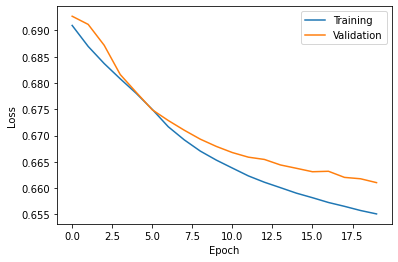

In [16]:
pic.plot_history(history)

In [17]:
y_b_pred = model.predict(X_test)

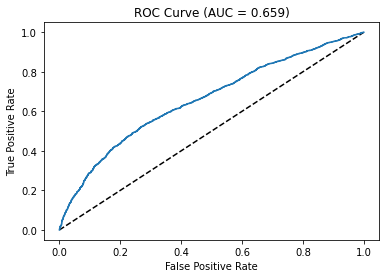

In [18]:
pic.plot_roc(y_b_test[:,0],y_b_pred[:,0])